# Исследование надежности заемщиков


**Описание проекта:**

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [15, 7]
sns.set_style('darkgrid')

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [3]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [4]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Проверим, пропуски в `total_income` и `days_employed` находятся ли на одних строках:

In [6]:
len(data.loc[(data['days_employed'].isna()) & (data['total_income'].isna())])

2174

Вполне возможно, заемщик не предоставил данные (они были не обязательны у определенного контрагента) и значения указали `NaN`

База данных имеет 21525 запись. Заголовки оформлены однотипно, понятно и придерживаются `snake_case`. Каждый столбец имеет соответствующий, хранящимся там данным, тип. Имеется 2 (два) столбца с отсутствующими данными.

## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [7]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [8]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [9]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [10]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [11]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [12]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [13]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [14]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [15]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [16]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [17]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [18]:
data.duplicated().sum()

71

In [19]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [20]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [21]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [22]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [23]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [24]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

Для определения дальнейших зависимостей необходимо провести ранжирование клиентов по искомым категориям. Для составления рейтинга, помимо искомой категории из вопроса, нам понадобится также информация о задолженность по возврату кредитов **`debt`**.

Рейтинг будет рассчитываться на основании корреляции количества задолженностей и количества кредитов в рамках определенной группы категории.

*Например:* Мы имеем 2 (две) просрочки из 10 (десяти) выданных кредитов на группу лиц имеющих 5 (пять) детей. Корреляция данной группы будет составлять 0.2 (две десятых) или же 20 (двадцать) %. В тоже время в группе лиц имеющих 3 (трех) детей, 10 (десять) просрочек на 1000 (тысячу) выданных кредитов, соответственно корреляция составляет 0.01 (одна сотую) или же 1 (один) % . На основании данного примера можно сказать, что группа лиц имеющих 3 (трех) детей является более надежной категорией заемщиков, чем группа лиц имеющих 5 (пять) детей.

**На основе примера выше можно сделать несколько выводов:**
- Важно анализировать корреляцию просрочек, а не их количество;
- Учитывать данные с количеством кредитов менее 3 (трех) % от общего количества является нецелесообразным. Причина заключается в большой статпогрешности.

Проверю уникальные значения в столбце **`debt`**:

In [25]:
data['debt'].unique()

array([0, 1], dtype=int64)

В столбце **`debt`** используется булевая система для обозначения просрочек. В таком случае можно посчитать:
1. количество задолженностей суммировав все 1 (единицы) в рамках определенной группы искомой категории;
1. количество записей в рамках искомой категории для определения количества выданных кредитов в рамках определенной группы искомой категории;
1. корреляцию между количеством задолженностей и количеством выданных кредитов в рамках определенной группы искомой категории.

Выясню сколько составляет 3 (три) % от общего количества кредитов:

In [26]:
int(round(data['debt'].count() * 3 / 100, 0))

640

Исследовать корреляцию данных в рамках определенной группы категории с количеством кредитов менее 640 (шестьсот сорока) нерентабельно из-за высокой статпогрешности.

Для ответа на дальнейшие вопросы нам поможет формула для составления сводной таблицы и визуализации данных в виде графика `barplot`:

In [27]:
def pivot(data, index):
    
    pivot = data.pivot_table(index = index, values = 'debt', aggfunc = ['sum', 'count', 'mean']).reset_index()
    pivot.columns = [index, 'Кол-во должников', 'Кол-во клиентов', 'Доля невозврата']
    index_dict = {'children': 'дети', 'family_status':'семейный статус', 'total_income_category': 'категория доходов', 'purpose_category':'цель кредита'}
    display(pivot.sort_values('Доля невозврата'))
    
    sns.barplot(data=pivot, x = index, y = 'Доля невозврата')
    
    plt.xlabel(index_dict[index], fontsize=14)
    plt.ylabel('Доля невозврата', fontsize=14)
    
    plt.show()

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

,children,Кол-во должников,Кол-во клиентов,Доля невозврата
5,5,0,9,0.000000
0,0,1063,14091,0.075438
3,3,27,330,0.081818
1,1,444,4808,0.092346
2,2,194,2052,0.094542
4,4,4,41,0.097561


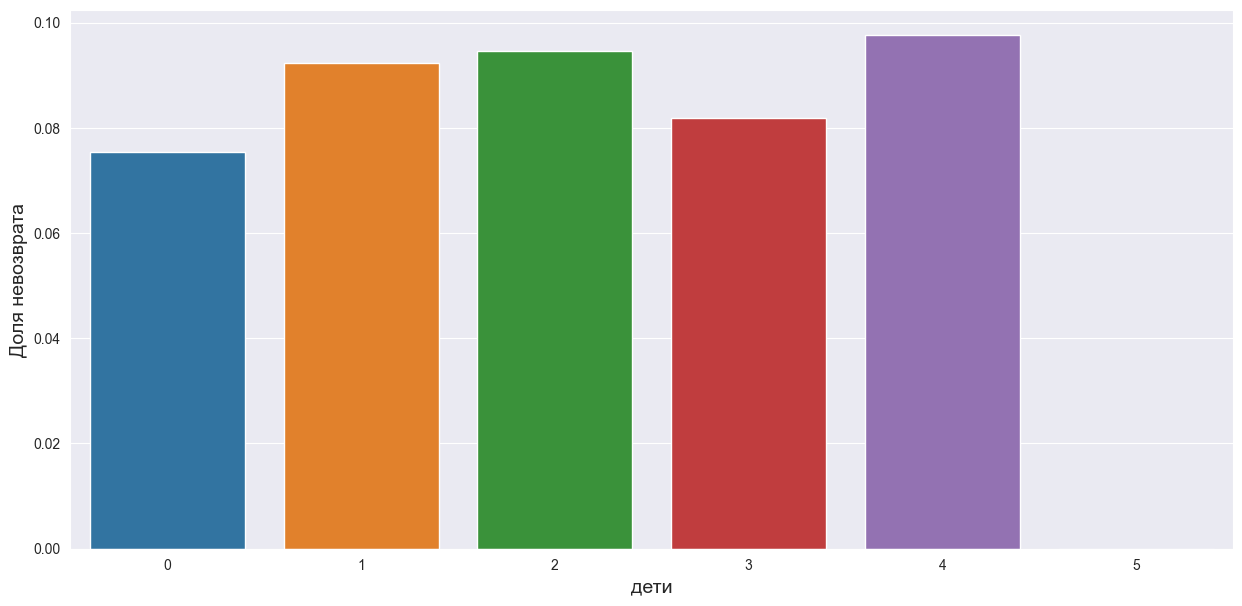

In [28]:
pivot(data, 'children')

**Вывод:** Заемщики без детей имеют корреляцию ниже, по сравнению с заемщиками с детьми. Доля невозврата кредита в срок без детей составляет 7,5 (семь целых пять десятых) %, в то время как с 1 (одним) ребенком уже 9,2 (девять целых две десятых) %, а с 2 (двумя) детьми - 9,4 (девять целых четыре десятых) %. Количество детей напрямую влияет на увеличение количества просрочек по кредиту.

В выводе не учитывались данные по многодетным семьям (3 (три) и более детей), т.к. количество кредитов лиц с 3 (тремя), 4 (четырьмя) и 5 (пятью) детьми не превышает 3 (трех) % от общего количества заемщиков. Этих данных недостаточно для корректных выводов по ним.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,family_status,Кол-во должников,Кол-во клиентов,Доля невозврата
2,вдовец / вдова,63,951,0.066246
1,в разводе,84,1189,0.070648
4,женат / замужем,927,12261,0.075606
3,гражданский брак,385,4134,0.093130
0,Не женат / не замужем,273,2796,0.097639


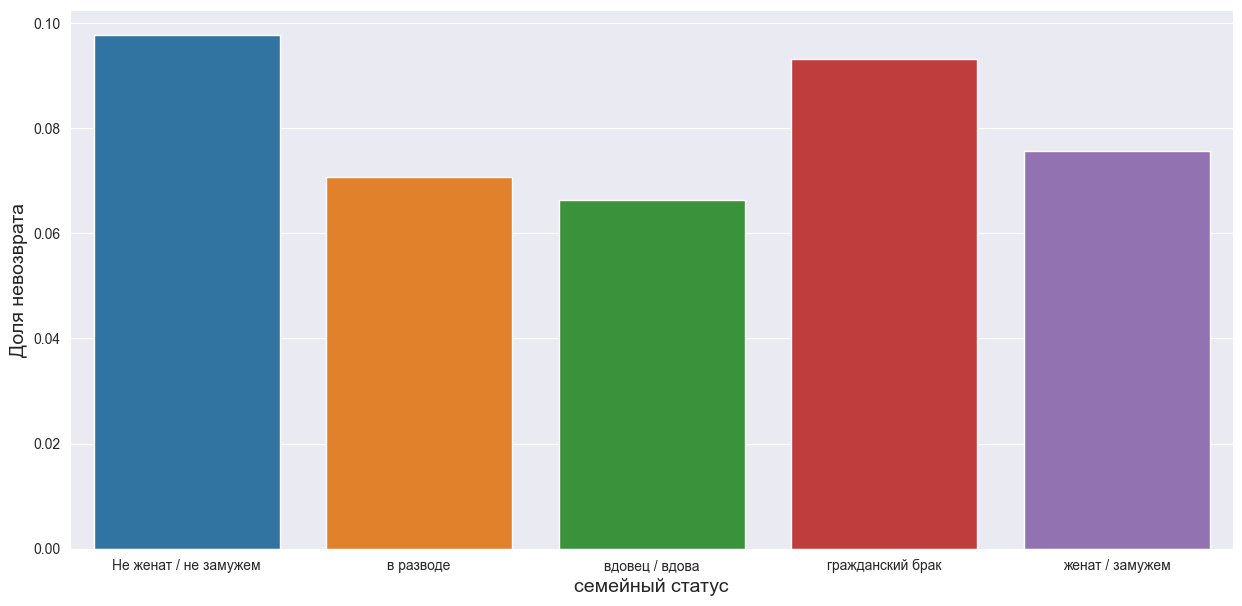

In [29]:
pivot(data, 'family_status')

**Вывод:** Наименьший процент задолженности у группы вдовцов и вдов, при этом группа лиц не имеющих каких-либо официальных отношений задерживает платежи в 1.5 (полтора) раза чаще. 

Для более детального сравнения необходимо посмотреть на данные категории в разрезе возраста клиентов. Возможно семейное положение не столько влияет скоринг, сколько возраст самих заемщиков.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,total_income_category,Кол-во должников,Кол-во клиентов,Доля невозврата
3,D,21,349,0.060172
1,B,354,5014,0.070602
0,A,2,25,0.080000
2,C,1353,15921,0.084982
4,E,2,22,0.090909


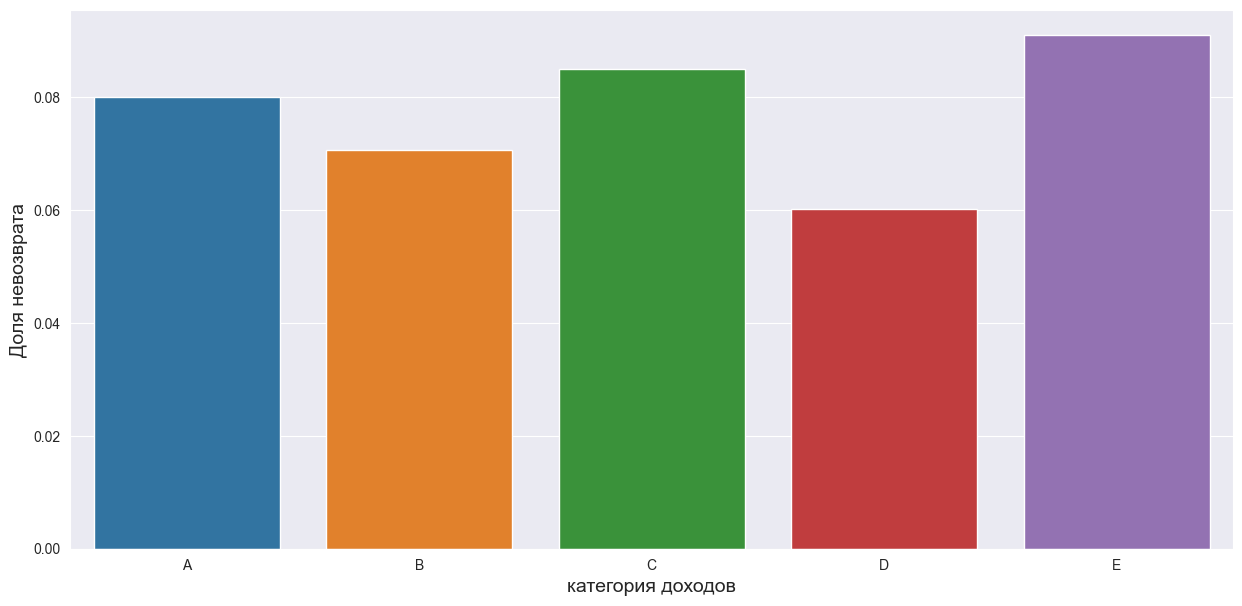

In [30]:
pivot(data, 'total_income_category')

**Вывод:** Данные по группам **А**, **D** и **Е** имею слишком малое количество данных (менее 3 (трех) % от общего количество заемщиков). Поэтому данные являются нерелевантные, из-за высокой статпогрешности.

Категории **B** и **С** имеют корреляцию 7,0 (семь целых) % и 8,4 (восемь целых четыре десятых) % соответственно. Так же группа клиентов категории доходности **С** является наиболее массовой в выборке (74 (семьдесят четыре) %). Это показывает, что уровень дохода влияет на возврат кредита в срок, т.е. их (группы **В**) доход позволяет вовремя погасить кредит. При этом, заемщиков с высоким уровнем дохода меньше (они наименее заинтересованы в кредитовании (доход позволяет обойтись без кредитов)).

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,purpose_category,Кол-во должников,Кол-во клиентов,Доля невозврата
1,операции с недвижимостью,780,10751,0.072551
3,проведение свадьбы,183,2313,0.079118
2,получение образования,369,3988,0.092528
0,операции с автомобилем,400,4279,0.093480


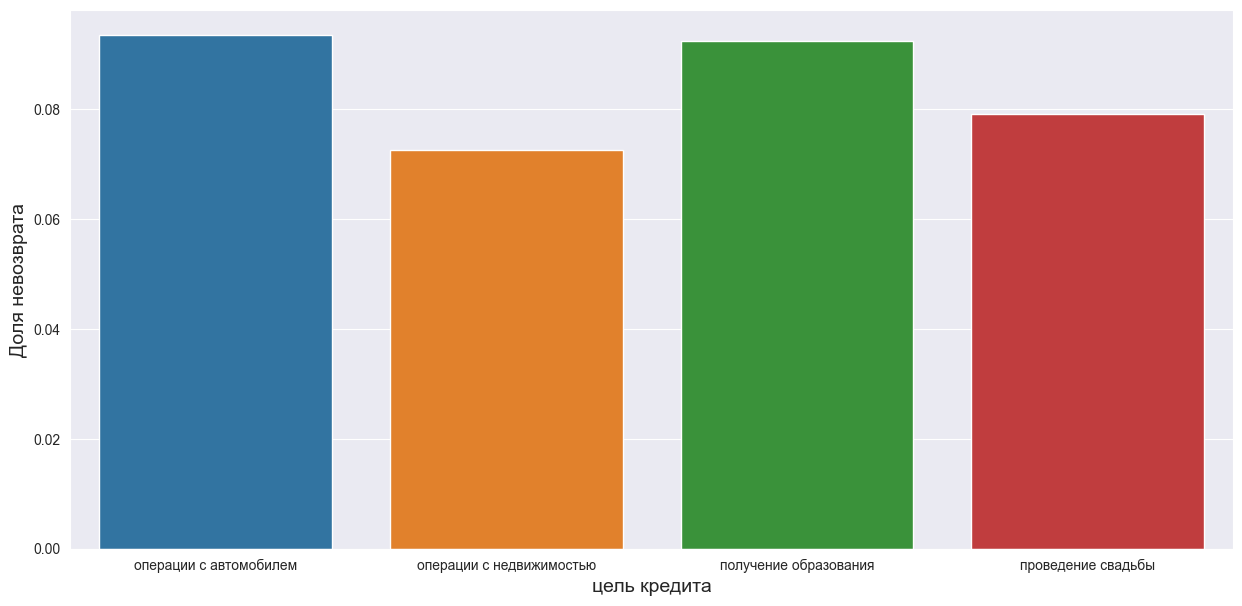

In [31]:
pivot(data, 'purpose_category')

**Вывод:** Займы по операциям с недвижимостью составляют 50 (пятьдесят) % от общего количества и при этом заемщики ответственнее подходят к выплатам. Займы по автокредитам имеют наибольшую долю задолженностей. Предполагаю, что к покупке недвижимости заемщик подходит более осознано, чем к покупке автомобиля (возможна покупка автомобиля превышающего бюджет заемщика, что и приводит к просрочкам по платежам).

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

Данные отсутствовали в 2 (двух) столбцах и их количество было одинаковым (ровно по 2174 (две тысячи сто семьдесят четыре) записи). Есть несколько причин подобного:
- специалист не внес размер дохода и стаж заемщика (человеческий фактор);
- заемщик не предоставил данные (они были не обязательны у определенного контрагента) и значения указали **`NaN`** (человеческий фактор);
- сбой работы базы данных при выгрузке или работы приложения при внесении данных в базу (технологический фактор).

Стоит отметить, что в первоначальном виде, данные о стаже работы имели отрицательные значения, что больше склоняет меня, что ошибка является технологической.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

В данном случае, при обнаружении отсутствующих значений, было 3 варианта действий:
- игнорировать данную проблему;
- удалить данные (строки) с пустыми значениями;
- заменить определенные значения.

Подробнее рассмотрим каждый вариант:
*Игнорирование проблемы*: подобные пропуски будут искажать данные и мешать проводить подсчеты. Например, при подсчете среднего ежемесячного дохода.

*Удаление данных (строк) с пустыми значениями*: подобный вариант возможен, если данные не будут влиять на подтверждение или опровержение гипотез и составляют менее 10 (десяти) % от всех данных.

*Замена данных*: необходимо определить на что меняем пустые значения. В нашем случае лучше использовать медианное значение. Оно менее подвержено влиянию к пиковым значениям в выборке. При этом используется не по всем данным, а с уклоном на тип занятости заемщика.

Таким образом, замена пустых ячеек на медианное значение является оптимальным.

### Шаг 4: общий вывод.

Для построения модели кредитного скоринга проанализировали данные кредитного отдела банка. Данные представляли собой выборку текущих клиентов.

В рамках анализа проверены следующие гипотезы:

***Есть ли зависимость между количеством детей и возвратом кредита в срок?***

В рамках данного исследования не удалось оценить многодетные группы клиентов с 3 (тремя) и более детьми - выборка оказалась слишком малой для анализа.
Группа клиентов без детей оказалась самой многочисленной (более 60 (шестидесяти) %) и процент задержек по кредиту самый низкий - 7.54 (семь целый пятьдесят четыре сотых) %. Самый высокий процент задержек по оплатам оказался у клиентов с двумя детьми и составляет 9.45 (девять целых сорок пять сотых) %. 

Гипотеза про зависимость между количеством детей и возвратом кредита в срок подтвердилась частично. Корреляция без детей и с 1 (одним) или 2 (двумя) детьми действительно имеет тенденцию на увеличение, но из-за малой доли многодетных заемщиков (менее 3 (трех) % от общего количества заемщиков) не удалось полностью подтвердить данную гипотезу.

***Есть ли зависимость между семейным положением и возвратом кредита в срок?***

По результатам проверки данной гипотезы выявлена следующая закономерность: меньше всего просрочек по кредитам у вдов/вдовцов - 6.62 (шесть целых шестьдесят две сотых) %, больше всего у клиентов, не состоящих в официальных отношениях 9.76 (девять целых семьдесят шесть сотых) %. Самой массовой категорией являются клиенты в браке (57 (пятьдесят семь) %), процент просрочек по данной категории составляет 7.56 (семь целых пятьдесят шесть сотых) %.

Для более детального сравнения необходимо посмотреть на данные категории в разрезе возраста клиентов. Возможно семейное положение не столько влияет скоринг, сколько возраст самих заемщиков.

***Есть ли зависимость между уровнем дохода и возвратом кредита в срок?***

В рамках данного исследования не удалось оценить группы клиентов с категориями доходности А, D и Е - выборка оказалась слишком малой для анализа.
По результатам проверки данной гипотезы выявлена следующая закономерность: меньше всего просрочек по кредитам у группы клиентов категории доходности В (уровень дохода от 200 000 (двухсот тысяч) до 1 000 000 (одного миллиона) рублей в месяц) - 7.06 (семь целых шесть сотых) %. Больше всего у группы клиентов категории доходности С (уровень дохода от 50 000 (пятидесяти тысяч) до 200 000 (двухсот тысяч) рублей в месяц) - 8.50 (восемь целых пять десятых) %. Так же группа клиентов категории доходности С (уровень дохода от 50 000 (пятидесяти тысяч) до 200 000 (двухсот тысяч) рублей в месяц) является наиболее массовой в выборке (74 (семьдесят четыре) %).

Гипотеза о зависимости между уровнем дохода и возвратом кредита в срок подтвердилась. Уровень дохода влияет на возврат кредита в срок, т.е. заемщиков с высоким уровнем дохода меньше (они наименее заинтересованы в кредитовании (доход позволяет обойтись без кредитов)), в тоже время их (группы В) доход позволяет вовремя погасить кредит.

***Как разные цели кредита влияют на его возврат в срок?***
По результатам проверки данной гипотезы выявлена следующая закономерность - меньше всего просрочек по кредитам на недвижимость (7.26 (семь целых двадцать шесть сотых) %), больше всего по займам на автомобиль (9.35 (девять целых тридцать пять сотых) %). При этом, самой массовой категорией являются займы на недвижимость - 50 (пятьдесят) % всех займов.

Гипотеза о том, что разные цели кредита влияют на его возврат в срок, подтвердилась. В зависимости от цели кредита изменяется и процент задержек по нему.

---

Дополнительно, было бы неплохо создать диаграмму рассеивания на основе проведенных исследований для выявления "идеального" заемщика и выявления "группы риска". 
Можно еще провести анализ по количеству дней просрочки и объемам просрочек. Это позволит выявить возможные финансовые риски при задержке кредита. Например, задержка выплат по кредиту в 2 000 000 (два миллиона) рублей является критичнее, чем задержка 10 (десяти) выплат по кредитам в 50 000 (пятьдесят тысяч) рублей. В то же время, задержка 10 (десяти) выплат по кредитам в 50 000 (пятьдесят тысяч) рублей на пол года является критичнее, чем задержка выплаты по кредиту в 2 000 000 (два миллиона) рублей на 1 (один) день.

Это позволит определить более точно, какая группа, с точки зрения задолженности порождает наибольшие финансовые проблемы. Результаты можно использовать для скоринга.

---

База данных имеет 21525 запись. Заголовки оформлены однотипно, понятно и придерживаются `snake_case`. Каждый столбец имеет соответствующий, хранящимся там данным, тип. Имелись 2 (два) столбца с отсутствующими  данными:  `days_employed` и `total_income`. В каждом столбце отсутствовало по *2174* значений. При этом пропуски были одновременно в 2 (двух) столбцах в рамках одной строки. Пропущенные данные заменили медиальным значением в рамках каждого уникального `income_type`. 

Так же перед исследованием провел следующие изменения в базе данных:
- в столбце `days_employed` были отрицательные значения (исправили через **abs()**);
- убрал аномальные значения в столбце `children`;
- в столбце `income_type` изменил значения с типа *float* на тип *int* для упрощения подсчета;
- столбец `education` привел к нижнему регистру и убрали дубликаты;
- категоризацию столбцов `total_income` и `purpose.